# Edmonton Traffic and Congestion Analysis
Let's analyize traffic data from the City of Edmonton using the Average Annual Weekday Traffic Data Set provided by the City of Edmonton.
Some preliminary questions:
- How has the traffic density changed over the years since data has been collected?
- Which avenues and streets are subjected to denser traffic throughout the week?
- Evolution of traffic for the areas with denser traffic count.

In [173]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [18]:
data = pd.read_csv('./data-src/AAWDT.csv')

## Exploratory Analysis
- Understanding data types and shape of the dataframe


In [19]:
data.head()

,Site Number,Street Description,Lat,Long,Lat Adjusted,Long Adjusted,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,505840,2 Avenue SW West of 65 Street SW,53.430849,-113.441704,53.430849,-113.441704,3000,2900,3000,3100,3100,2900,3400,3200,3300,2900,3200,3400
1,505608,3 Avenue SW West of 58 Street SW,53.430372,-113.431425,53.430372,-113.431425,-,1400,1500,1500,1500,1400,1400,2600,2700,2300,2500,2600
2,430645,3 Street NE North of 161 Avenue NE,53.624098,-113.335494,53.624098,-113.335494,-,300,400,400,400,400,600,600,700,600,700,800
3,505464,4 Avenue SW West of 50 Street SW,53.428640,-113.421120,53.428640,-113.421120,-,1200,1200,1200,1200,1100,5600,5200,5400,4600,5000,5200
4,204850,9 Avenue SW West of 207 Street SW,53.424944,-113.683073,53.424944,-113.683073,300,300,300,300,300,400,400,400,500,500,600,700


In [20]:
data.shape

(4245, 18)

In [21]:
data.dtypes

Site Number             int64
Street Description     object
Lat                   float64
Long                  float64
Lat Adjusted          float64
Long Adjusted         float64
2011                   object
2012                   object
2013                   object
2014                   object
2015                   object
2016                   object
2017                   object
2018                    int64
2019                    int64
2020                    int64
2021                    int64
2022                    int64
dtype: object

## Data preprocessing
- Data stored in columns 2011 to 2017 are stored as strings

In [148]:
str_col = ['2011','2012','2013','2014','2015','2016','2017']

for col in str_col:
    data[col] = pd.to_numeric(data[col],errors='coerce')

data.head()

,Site Number,Street Description,Lat,Long,Lat Adjusted,Long Adjusted,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,mean_traffic
0,505840,2 Avenue SW West of 65 Street SW,53.430849,-113.441704,53.430849,-113.441704,3000.0,2900.0,3000.0,3100.0,3100.0,2900.0,3400.0,3200,3300,2900,3200,3400,3116.666667
1,505608,3 Avenue SW West of 58 Street SW,53.430372,-113.431425,53.430372,-113.431425,NaN,1400.0,1500.0,1500.0,1500.0,1400.0,1400.0,2600,2700,2300,2500,2600,1945.454545
2,430645,3 Street NE North of 161 Avenue NE,53.624098,-113.335494,53.624098,-113.335494,NaN,300.0,400.0,400.0,400.0,400.0,600.0,600,700,600,700,800,536.363636
3,505464,4 Avenue SW West of 50 Street SW,53.428640,-113.421120,53.428640,-113.421120,NaN,1200.0,1200.0,1200.0,1200.0,1100.0,5600.0,5200,5400,4600,5000,5200,3354.545455
4,204850,9 Avenue SW West of 207 Street SW,53.424944,-113.683073,53.424944,-113.683073,300.0,300.0,300.0,300.0,300.0,400.0,400.0,400,500,500,600,700,416.666667


### Exploratory Analysis
- General statistics

In [24]:
data.describe()

,Site Number,Lat,Long,Lat Adjusted,Long Adjusted,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,4245.000000,4245.000000,4245.000000,4245.000000,4.245000e+03,1646.000000,1881.000000,2237.000000,2730.000000,3451.000000,3451.000000,4021.000000,4245.000000,4245.000000,4245.000000,4245.000000,4245.000000
mean,328000.404711,53.532465,-113.503709,53.532468,-2.673187e+05,12193.134872,11896.012759,11975.502906,12330.219780,13160.213272,12688.032454,11896.841582,11064.122497,11392.131920,9784.876325,10519.458186,10990.600707
std,146733.642918,0.055283,0.074108,0.055282,1.740940e+07,14760.365734,14989.920729,15055.046247,15024.149814,15601.325859,14949.132646,14487.985500,13616.323694,13975.869008,11915.809055,12749.045655,13256.543695
min,100004.000000,53.391487,-113.718372,53.391487,-1.134286e+09,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,200.000000,200.000000,300.000000,400.000000
25%,229948.000000,53.494151,-113.543732,53.494119,-1.135439e+02,1900.000000,1700.000000,1700.000000,1800.000000,1900.000000,1800.000000,1600.000000,1400.000000,1500.000000,1300.000000,1400.000000,1500.000000
50%,316326.000000,53.537539,-113.501545,53.537539,-1.135016e+02,6100.000000,5600.000000,5600.000000,6000.000000,6800.000000,6600.000000,5700.000000,5200.000000,5400.000000,4600.000000,5000.000000,5200.000000
75%,440089.000000,53.570466,-113.449717,53.570620,-1.134500e+02,19000.000000,18600.000000,18400.000000,19200.000000,20700.000000,20000.000000,18600.000000,17200.000000,17600.000000,15200.000000,16300.000000,17000.000000
max,700026.000000,53.694162,-113.254686,53.694162,-1.132547e+02,109800.000000,111400.000000,113600.000000,114900.000000,121300.000000,115200.000000,122800.000000,116700.000000,120300.000000,102300.000000,109500.000000,113900.000000


#### Comparing means and traffic from 2011 to 2022

In [31]:
data.loc[:,'2011':'2022'].mean()

2011    12193.134872
2012    11896.012759
2013    11975.502906
2014    12330.219780
2015    13160.213272
2016    12688.032454
2017    11896.841582
2018    11064.122497
2019    11392.131920
2020     9784.876325
2021    10519.458186
2022    10990.600707
dtype: float64

<Axes: >

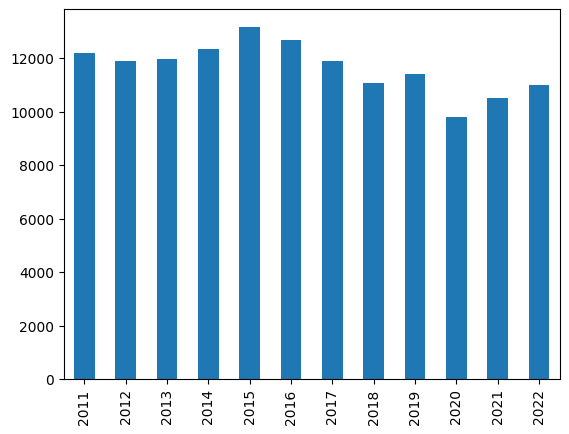

In [34]:
data.loc[:,'2011':'2022'].mean().plot.bar()

- The following can be observed:
  - The average traffic congestion has remained somewhat constant form 2011 to 2017
  - There's a noticeable drop in traffic during the COVID pandemic
  - Traffic has yet to reach the density levels pre-pandemic era

## Data Analysis
### Areas of the city with denser average traffic

<Axes: xlabel='Street Description'>

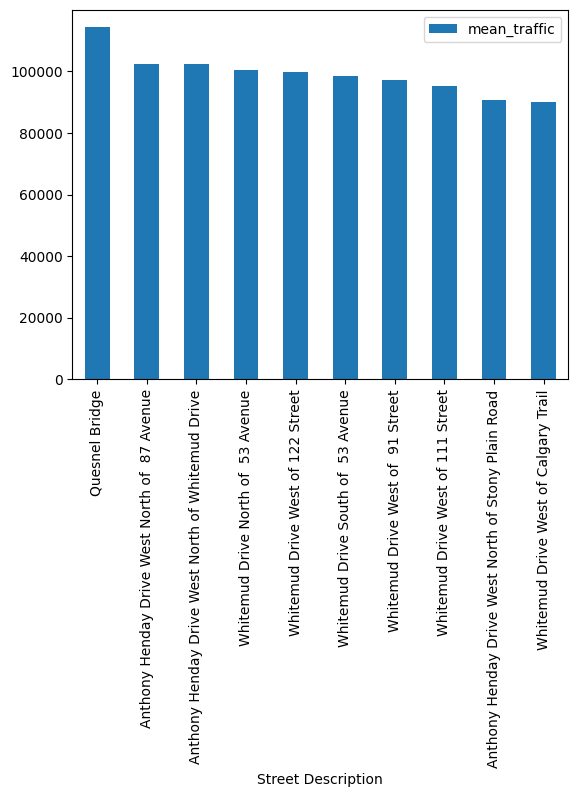

In [55]:
data['mean_traffic'] = data.loc[:,'2011':'2022'].mean(numeric_only=True, axis=1)
data.sort_values('mean_traffic',ascending=False).head(10).plot.bar(x='Street Description', y='mean_traffic')


#### Map Visualization

In [68]:
dense_traffic_df = data.sort_values('mean_traffic',ascending=False).head(10)


Map = folium.Map(location=[53.54,-113.49], zoom_start=12)
for index,row in dense_traffic_df.iterrows():
    folium.CircleMarker(location=(row.Lat, row.Long), color='red',weight=2 ).add_to(Map)

Map


- Areas with denser traffic seem concentrated in the outer rim of the city
- Denser traffic areas are exclusively located in highways such as:
  - Anthony Henday
  - Whitemud Drive
- Areas with denser traffic seem skewed to the west and south of the city

#### Evolution of traffic on the 10 areas with highest traffic density

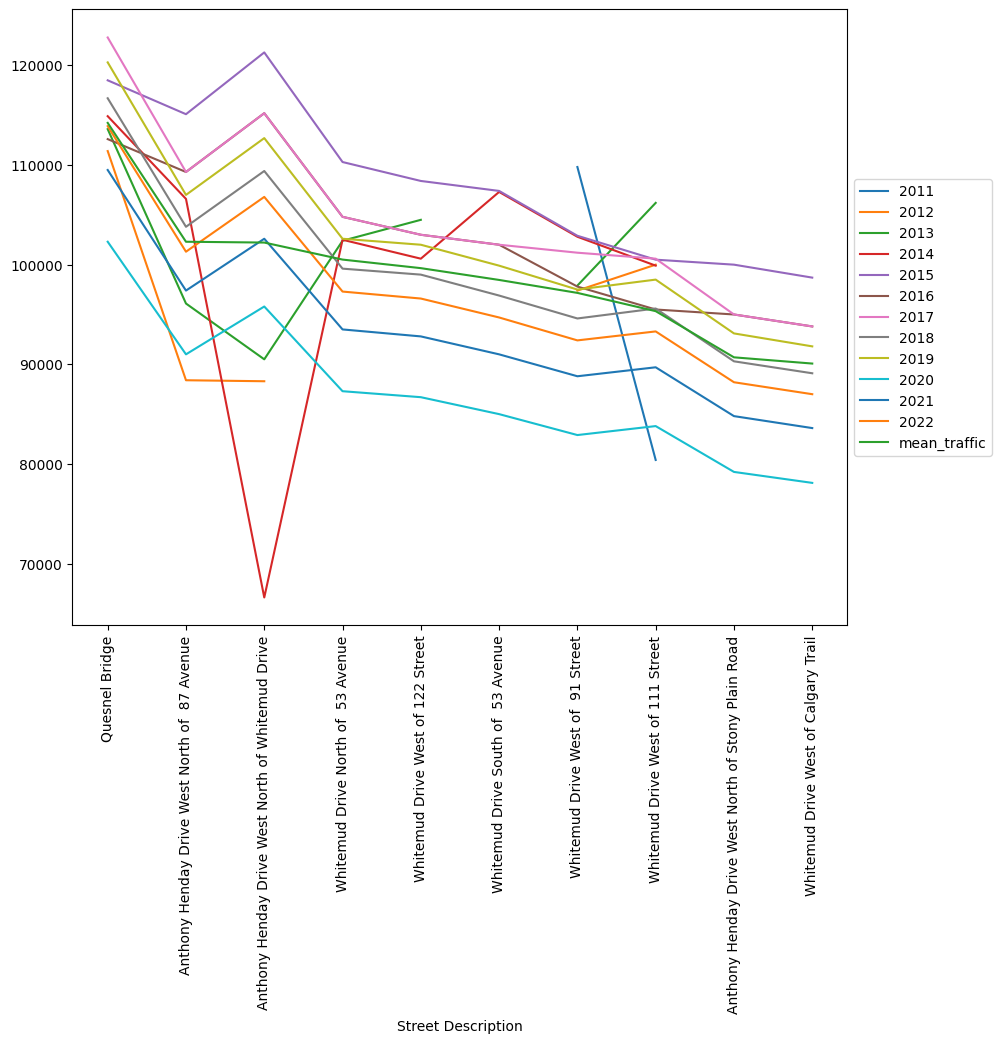

In [118]:
traffic_evol = dense_traffic_df.drop(['Lat','Long','Lat Adjusted','Long Adjusted','Site Number'], axis=1)
traffic_evol.set_index('Street Description', inplace=True)
ax = traffic_evol.plot(kind='line', figsize=(10,8))
ax.set_xticks(range(len(traffic_evol['mean_traffic'])))
ax.set_xticklabels([street for street in traffic_evol.index.tolist()], rotation = 90)
ax.legend(loc = 'center left', bbox_to_anchor=(1.0, 0.5))


- In the 10 areas with the highest amount of traffic:
  - Trafficy density over the years follows the rate of change of the mean.
  - COVID impacted all traffic areas similarly 

### Inner City Traffic (Downtown)
- Understood as traffic taking place in Downtown Edmonton:
  - Understood as the area bound by 109 Street to the west, 105 Avenue to the north, 97 Street to the east, 97 Avenue and Rossdale Road to the south

In [137]:
lat_limits = [53.54823, 53.53431]
long_limits =[-113.50852,-113.48538]

downtown = data[(data.Lat > lat_limits[1]) & (data.Lat < lat_limits[0])]
downtown = downtown[(data.Long > long_limits[0]) & (data.Long < long_limits[1])]

downtown

C:\Users\fabio\AppData\Local\Temp\ipykernel_12264\3870408582.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  downtown = downtown[(data.Long > long_limits[0]) & (data.Long < long_limits[1])]


,Site Number,Street Description,Lat,Long,Lat Adjusted,Long Adjusted,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,mean_traffic
1086,111687,97 Street North of 101A Avenue,53.543530,-113.486059,53.543530,-113.486059,NaN,NaN,NaN,11400.0,11400.0,10800.0,10600.0,10100,10500,9000,9700,10100,10400.000000
1087,111689,97 Street North of 102 Avenue,53.544439,-113.486455,53.544439,-113.486455,NaN,NaN,NaN,13200.0,13200.0,12300.0,11800.0,11200,11600,9900,10600,11100,11655.555556
1088,111691,97 Street North of 102A Avenue,53.545433,-113.486796,53.545433,-113.486796,NaN,NaN,NaN,11400.0,11400.0,10800.0,11400.0,10800,11200,9600,10300,10800,10855.555556
1089,111693,97 Street North of 103 Avenue,53.546156,-113.487081,53.546156,-113.487081,8700.0,8600.0,8700.0,12300.0,12300.0,11700.0,11800.0,11200,11600,9900,10600,11100,10708.333333
1090,111695,97 Street North of 103A Avenue,53.547485,-113.487615,53.547485,-113.487615,14300.0,14100.0,14300.0,15800.0,15800.0,17000.0,14400.0,13700,14200,12100,13000,13600,14358.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,111993,Rossdale Road North of 97 Avenue,53.534402,-113.497354,53.534402,-113.497354,NaN,NaN,NaN,7000.0,11200.0,10600.0,10900.0,10400,10800,9200,9900,10300,10033.333333
3884,100278,Rossdale Road West of 100 Street,53.537342,-113.492246,53.537342,-113.492246,NaN,NaN,NaN,2200.0,2200.0,2100.0,2100.0,2000,2100,1800,2000,2100,2066.666667
3885,100332,Rossdale Road West of 101 Street,53.536102,-113.494998,53.536102,-113.494998,5600.0,5500.0,5600.0,4300.0,4300.0,4100.0,4100.0,3900,4100,3500,3800,4000,4400.000000
3886,100328,Rossdale Road West of 102 Street,53.535391,-113.496257,53.535391,-113.496257,NaN,NaN,NaN,NaN,NaN,NaN,5600.0,5300,5500,4700,5100,5400,5266.666667


#### Checking data limits and downtown bounds

In [143]:
Map = folium.Map(location=[53.54,-113.49], zoom_start=15)
for index,row in downtown.iterrows():
    folium.CircleMarker(location=(row.Lat, row.Long), radius=4, color='red',weight=2 ).add_to(Map)

Map

#### Downtown areas with highest traffic density

<Axes: xlabel='Street Description'>

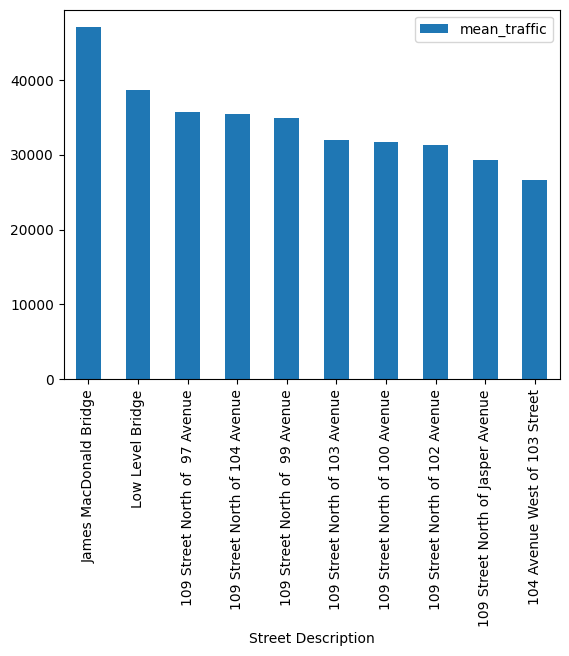

In [144]:
downtown['mean_traffic'] = downtown.loc[:,'2011':'2022'].mean(numeric_only=True, axis=1)
downtown.sort_values('mean_traffic',ascending=False).head(10).plot.bar(x='Street Description', y='mean_traffic')

##### Visualization

In [172]:
downtown_traffic_df = downtown.sort_values('mean_traffic',ascending=False).head(10)


Map = folium.Map(location=[53.54,-113.49], zoom_start=15, tiles='Stamen Toner')
for index,row in downtown_traffic_df.iterrows():
    folium.CircleMarker(location=(row.Lat, row.Long), color='red',weight=2 ).add_to(Map)

Map

- Denser traffit concentrates in areas of access or exit from downtown such as:
  - 109 Street NorthWest
  - James MacDonald Bridge
  - Low Level Bridge

#### Evolution of Downtown Traffic Density

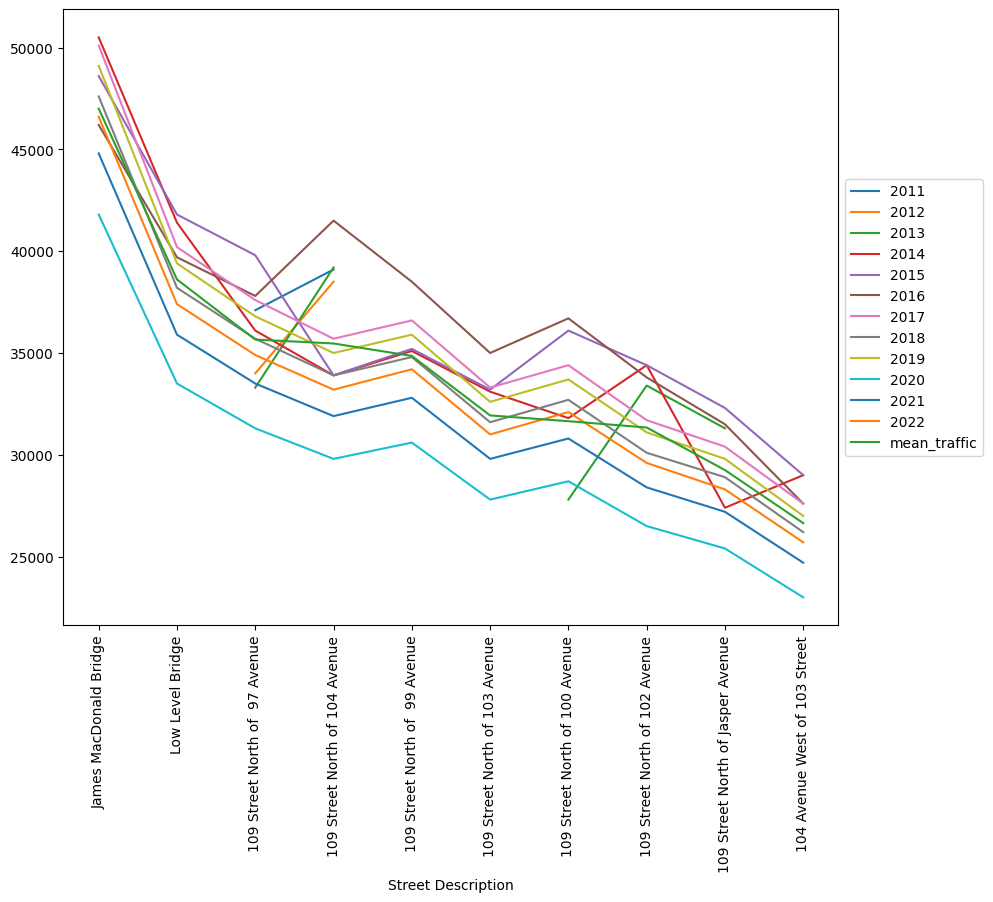

In [147]:
downtown_evol = downtown_traffic_df.drop(['Lat','Long','Lat Adjusted','Long Adjusted','Site Number'], axis=1)
downtown_evol.set_index('Street Description', inplace=True)
ax = downtown_evol.plot(kind='line', figsize=(10,8))
ax.set_xticks(range(len(downtown_evol['mean_traffic'])))
ax.set_xticklabels([street for street in downtown_evol.index.tolist()], rotation = 90)
ax.legend(loc = 'center left', bbox_to_anchor=(1.0, 0.5))

- Just as in the 10 most densely transited areas of Edmonton
  - Density follows the rate of change of the mean.
  - COVID impacted all traffic areas similarly  

### Density Distribution
- Analyzing the density distribution of the traffic data set

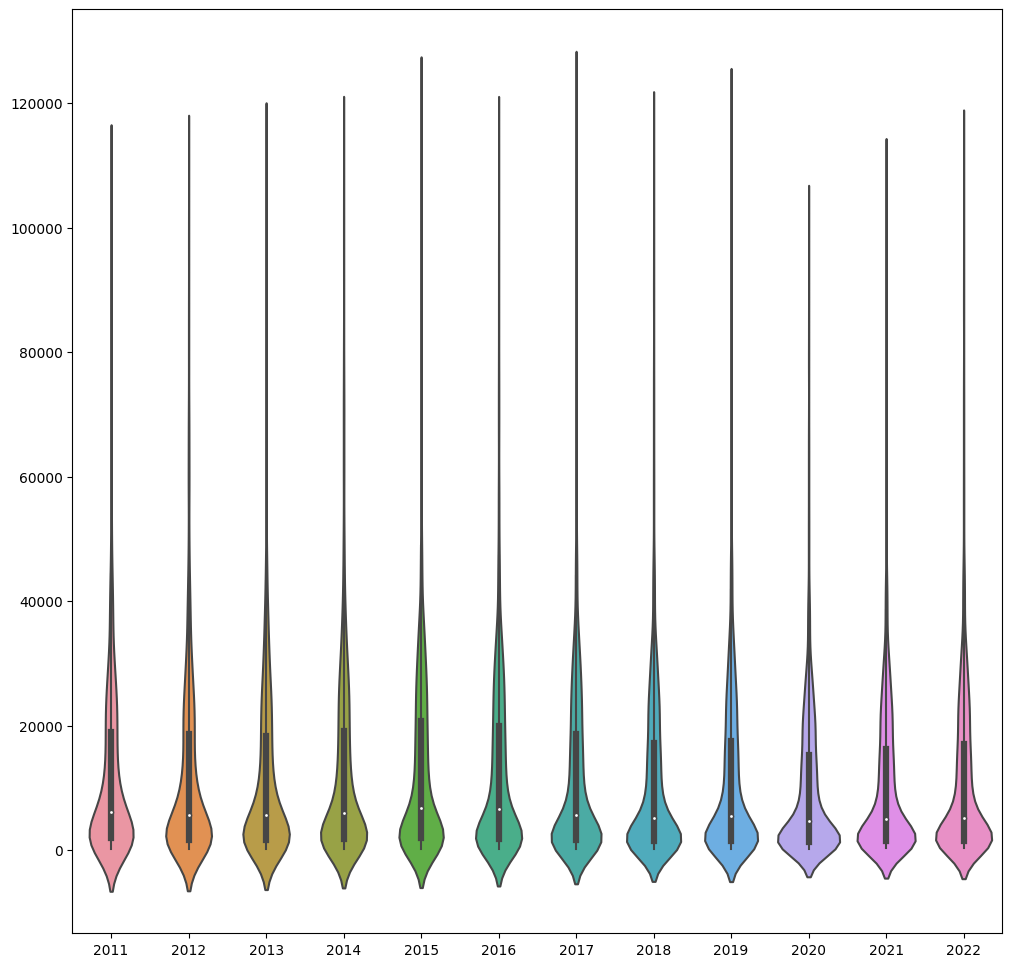

In [169]:
sns.violinplot(data.loc[:,'2011':'2022']).figure.set_size_inches(12,12)


- Data across the years holds a similar mean value with a similar 50th percentile variation.
- Data varies greatly outside its 50th percentile box.
- Further studies can focus on variations of traffic per hour-day or weekday to gather further insights in the distribtuion of traffic in Edmonton

## Conclusions:
- Some of the conclusions derived from the present analysis are:
  - Areas with denser traffict seem concentrated in the outer rim of the city. Specially in the South and West limits
  - In all areas of the city traffic density over the years follows the same movement as the mean. Indicating that at no point from 2011 to 2022, the traffic density of the city has shifted greatly to privilege a new highway, avenue or any other transportation path
  - Downtown traffic is more densely packed on the entry and exit points of the area
  - Downtown traffic from 2011 to 2022 follows the mean
  - Data accross the years remains consistent within the inner 50th percentile, but varies greatly outside of it.
  - Further studies can determine the impact of city design and construction on the skeweness of traffic in the city and how to best address it.